# Modelling a case study

## Situation:

A new respiratory virus has begun circulating in another country. So far, epidemiological investigations have yielded the data below. What is an estimate for the average infection rate (the ‘beta’ parameter) for this disease? If a vaccine with 80% effectiveness becomes available before an epidemic begins in your own country, what is the minimum coverage of this vaccine, in order to prevent an outbreak from occurring?

## Epidemiological data

* All infected individuals go through an incubation period, which lasts on average for 4 days. During this time, individuals are not infectious, nor do they have any excess mortality risk.  
* All infected individuals eventually develop symptoms, and the mean duration of symptoms before recovery or death is 5 days. Symptomatic individuals are infectious, as well as having a 3% case fatality rate. Those who survive the infection are thought to have long-term immunity.  
* In the source country, the peak prevalence (i.e. maximum number of symptomatic people during the epidemic) was observed to be 8% of the population.  
* Assume that the source country and your own country are epidemiologically equivalent (i.e. that disease transmission follows the same parameters in both settings).  

In [2]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import math
from scipy.integrate import odeint

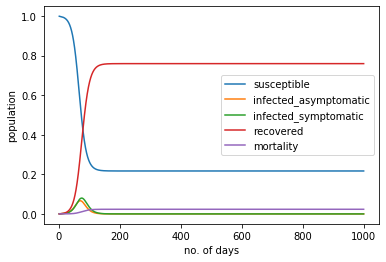

In [3]:
betta=0.39
nu=0.2
as_sy=0.25
p=0.97
pop=1000
def du_dt(u,t):
    lamda=betta*u[2]/pop
    return([-u[0]*(lamda),u[0]*lamda - as_sy*u[1],as_sy*u[1]-nu*u[2],nu*p*u[2],nu*(1-p)*u[2]])
x=np.linspace(1,1000,5000)
y0=[(pop-1),0,1,0,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected_asymptomatic")
plt.plot(x,y[:,2]/pop,label="infected_symptomatic")
plt.plot(x,y[:,3]/pop,label="recovered")
plt.plot(x,y[:,4]/pop,label="mortality")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

In [4]:
r0=betta/nu
j=r0*y[:,0]/pop
j[0]

1.94805

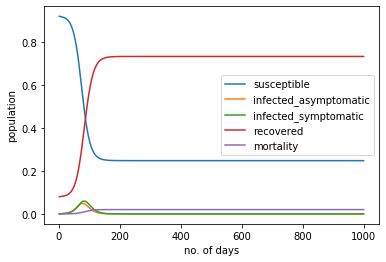

In [5]:
betta=0.39
nu=0.2
as_sy=0.25
p=0.97
pop=1000
p_v=0.1
v_eff=0.8
def du_dt(u,t):
    lamda=betta*u[2]/pop
    return([-u[0]*(lamda),u[0]*lamda - as_sy*u[1],as_sy*u[1]-nu*u[2],nu*p*u[2],nu*(1-p)*u[2]])
x=np.linspace(1,1000,5000)
y0=[(pop-1)*(1-v_eff*p_v),0,1,(pop-1)*(v_eff)*(p_v),0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected_asymptomatic")
plt.plot(x,y[:,2]/pop,label="infected_symptomatic")
plt.plot(x,y[:,3]/pop,label="recovered")
plt.plot(x,y[:,4]/pop,label="mortality")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

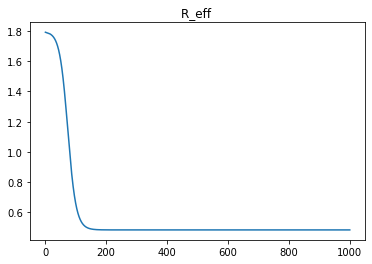

In [6]:
r0=betta/nu
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def ODE():
    # define model parameters
    t_0 = 0 
    t_end = 20
    length = 100000
    nu = 1.8
    betta = 0.3
    pop=1000
    # define time axis
    t = np.linspace(t_0,t_end,length) 
    dt = np.mean(np.diff(t))
    # initialize arrays for susceptible,infected and recovered
    s = np.zeros(length)
    inf = np.zeros(length)
    r = np.zeros(length)
    # initial condition
    s[0]=pop-1
    inf[0]=1.0
    r[0]=0.0
    # defining differential equation for each variable
    susceptible = lambda s_: -betta*s_
    infected = lambda s_,i_: betta*s_ - nu*i_
    recovered = lambda i_:nu*i_
    # solve SDE
    for i in np.arange(1,length):
        s[i] = s[i-1] + susceptible(s[i-1])*dt
        inf[i] = inf[i-1] + infected(s[i-1],inf[i-1])*dt
        r[i] = r[i-1] + recovered(inf[i-1])*dt
    return(s,inf,r,t)

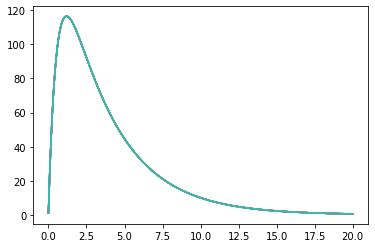

In [8]:
for j in range(10):
    s,i,r,t=ODE()
    #plt.plot(t,s,label="susceptible")
    plt.plot(t,i,label="infected")
    #plt.plot(t,r,label="recovered")
    #plt.legend()
plt.show()